# Titanic Survival Prediction

This notebook predicts the probability of survival in a titanic based on the dataset.

# Import Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, jarque_bera, normaltest
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.inspection import permutation_importance
import joblib
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)

Dataset Shape: (891, 12)
Memory Usage: 0.31 MB

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

First 5 rows:
Duplicate rows: 0

Statistical Summary:
Survival Rate: 0.384
Class Distribution: {0: 549, 1: 342}

Chi-square test results:
Sex: Chi2=260.7170, p-value=0.000000
Pclass

# Data Loading and Initial Exploration

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print(f"Dataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nDataset Info:")
df.info()
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (891, 12)
Memory Usage: 0.31 MB

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


from matplotlib import pyplot as plt
_df_0['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Ticket').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Cabin').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Survived', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Pclass', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Ticket')):
  _plot_series(series, series_name, i)
  fig.legend(title='Ticket', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Cabin')):
  _plot_series(series, series_name, i)
  fig.legend(title='Cabin', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
_df_16['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Pclass'].plot(kind='line', figsize=(8, 4), title='Pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sex'].value_counts()
    for x_label, grp in _df_20.groupby('Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Name')
_ = plt.ylabel('Sex')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Ticket'].value_counts()
    for x_label, grp in _df_21.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('Ticket')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Cabin'].value_counts()
    for x_label, grp in _df_22.groupby('Ticket')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Ticket')
_ = plt.ylabel('Cabin')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Embarked'].value_counts()
    for x_label, grp in _df_23.groupby('Cabin')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cabin')
_ = plt.ylabel('Embarked')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='PassengerId', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='PassengerId', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Ticket'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='PassengerId', y='Ticket', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Cabin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='PassengerId', y='Cabin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Data Quality Assessment

In [5]:
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

print("\nStatistical Summary:")
df.describe(include='all')

Duplicate rows: 0

Statistical Summary:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Target Variable Analysis and Statistical Tests

In [6]:
survival_counts = df['Survived'].value_counts()
survival_rate = df['Survived'].mean()

print(f"Survival Rate: {survival_rate:.3f}")
print(f"Class Distribution: {survival_counts.to_dict()}")

categorical_features = ['Sex', 'Pclass', 'Embarked']
chi_square_results = {}

for feature in categorical_features:
    if df[feature].notna().sum() > 0:
        contingency_table = pd.crosstab(df[feature], df['Survived'])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        chi_square_results[feature] = {'chi2': chi2, 'p_value': p_value}

print("\nChi-square test results:")
for feature, results in chi_square_results.items():
    print(f"{feature}: Chi2={results['chi2']:.4f}, p-value={results['p_value']:.6f}")

Survival Rate: 0.384
Class Distribution: {0: 549, 1: 342}

Chi-square test results:
Sex: Chi2=260.7170, p-value=0.000000
Pclass: Chi2=102.8890, p-value=0.000000
Embarked: Chi2=26.4891, p-value=0.000002


# Feature Engineering

In [8]:
df_engineered = df.copy()

df_engineered['FamilySize'] = df_engineered['SibSp'] + df_engineered['Parch'] + 1
df_engineered['IsAlone'] = (df_engineered['FamilySize'] == 1).astype(int)
df_engineered['SmallFamily'] = (df_engineered['FamilySize'].between(2, 4)).astype(int)
df_engineered['LargeFamily'] = (df_engineered['FamilySize'] > 4).astype(int)

df_engineered['Title'] = df_engineered['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Dr': 5, 'Rev': 6, 'Col': 7, 'Major': 7, 'Mlle': 2, 'Countess': 8, 'Ms': 2, 'Lady': 8, 'Jonkheer': 8, 'Don': 8, 'Dona': 8, 'Mme': 3, 'Capt': 7, 'Sir': 8}
df_engineered['Title'] = df_engineered['Title'].map(title_mapping).fillna(0)

df_engineered['Age'].fillna(df_engineered.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)
df_engineered['AgeGroup'] = pd.cut(df_engineered['Age'], bins=[0, 12, 18, 35, 60, 100], labels=[1, 2, 3, 4, 5])
df_engineered['IsChild'] = (df_engineered['Age'] < 16).astype(int)
df_engineered['IsElderly'] = (df_engineered['Age'] >= 60).astype(int)

df_engineered['Fare'].fillna(df_engineered['Fare'].median(), inplace=True)
df_engineered['FareGroup'] = pd.qcut(df_engineered['Fare'], q=5, labels=[1, 2, 3, 4, 5])
df_engineered['FarePerPerson'] = df_engineered['Fare'] / df_engineered['FamilySize']

df_engineered['CabinKnown'] = df_engineered['Cabin'].notna().astype(int)
df_engineered['CabinDeck'] = df_engineered['Cabin'].str[0]
deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
df_engineered['CabinDeck'] = df_engineered['CabinDeck'].map(deck_mapping).fillna(0)

df_engineered['Embarked'].fillna(df_engineered['Embarked'].mode()[0], inplace=True)
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
df_engineered['Embarked_Encoded'] = df_engineered['Embarked'].map(embarked_mapping)

df_engineered['Sex_Encoded'] = df_engineered['Sex'].map({'male': 0, 'female': 1})

df_engineered['Age_Pclass'] = df_engineered['Age'] * df_engineered['Pclass']
df_engineered['Fare_Age'] = df_engineered['Fare'] * df_engineered['Age']
df_engineered['Sex_Age'] = df_engineered['Sex_Encoded'] * df_engineered['Age']
df_engineered['Title_Age'] = df_engineered['Title'] * df_engineered['Age']

print(f"Engineered dataset shape: {df_engineered.shape}")

Engineered dataset shape: (891, 30)


# Polynomial Features and Advanced Transformations

In [9]:
from sklearn.preprocessing import PolynomialFeatures

numerical_features = ['Age', 'Fare', 'FamilySize', 'FarePerPerson']
numerical_data = df_engineered[numerical_features]

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(numerical_data)
poly_feature_names = poly.get_feature_names_out(numerical_features)

poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=df_engineered.index)

feature_columns = ['Survived', 'Pclass', 'Sex_Encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Encoded',
                  'FamilySize', 'IsAlone', 'SmallFamily', 'LargeFamily', 'Title', 'AgeGroup',
                  'IsChild', 'IsElderly', 'FareGroup', 'FarePerPerson', 'CabinKnown', 'CabinDeck',
                  'Age_Pclass', 'Fare_Age', 'Sex_Age', 'Title_Age']

df_final = df_engineered[feature_columns].copy()

selected_poly = ['Age^2', 'Fare^2', 'FamilySize^2', 'Age Fare', 'Age FamilySize']
for feature in selected_poly:
    if feature in poly_df.columns:
        df_final[f'Poly_{feature.replace(" ", "_").replace("^", "_pow")}'] = poly_df[feature]

print(f"Final feature set shape: {df_final.shape}")

Final feature set shape: (891, 29)


# Data Visualization Dashboard

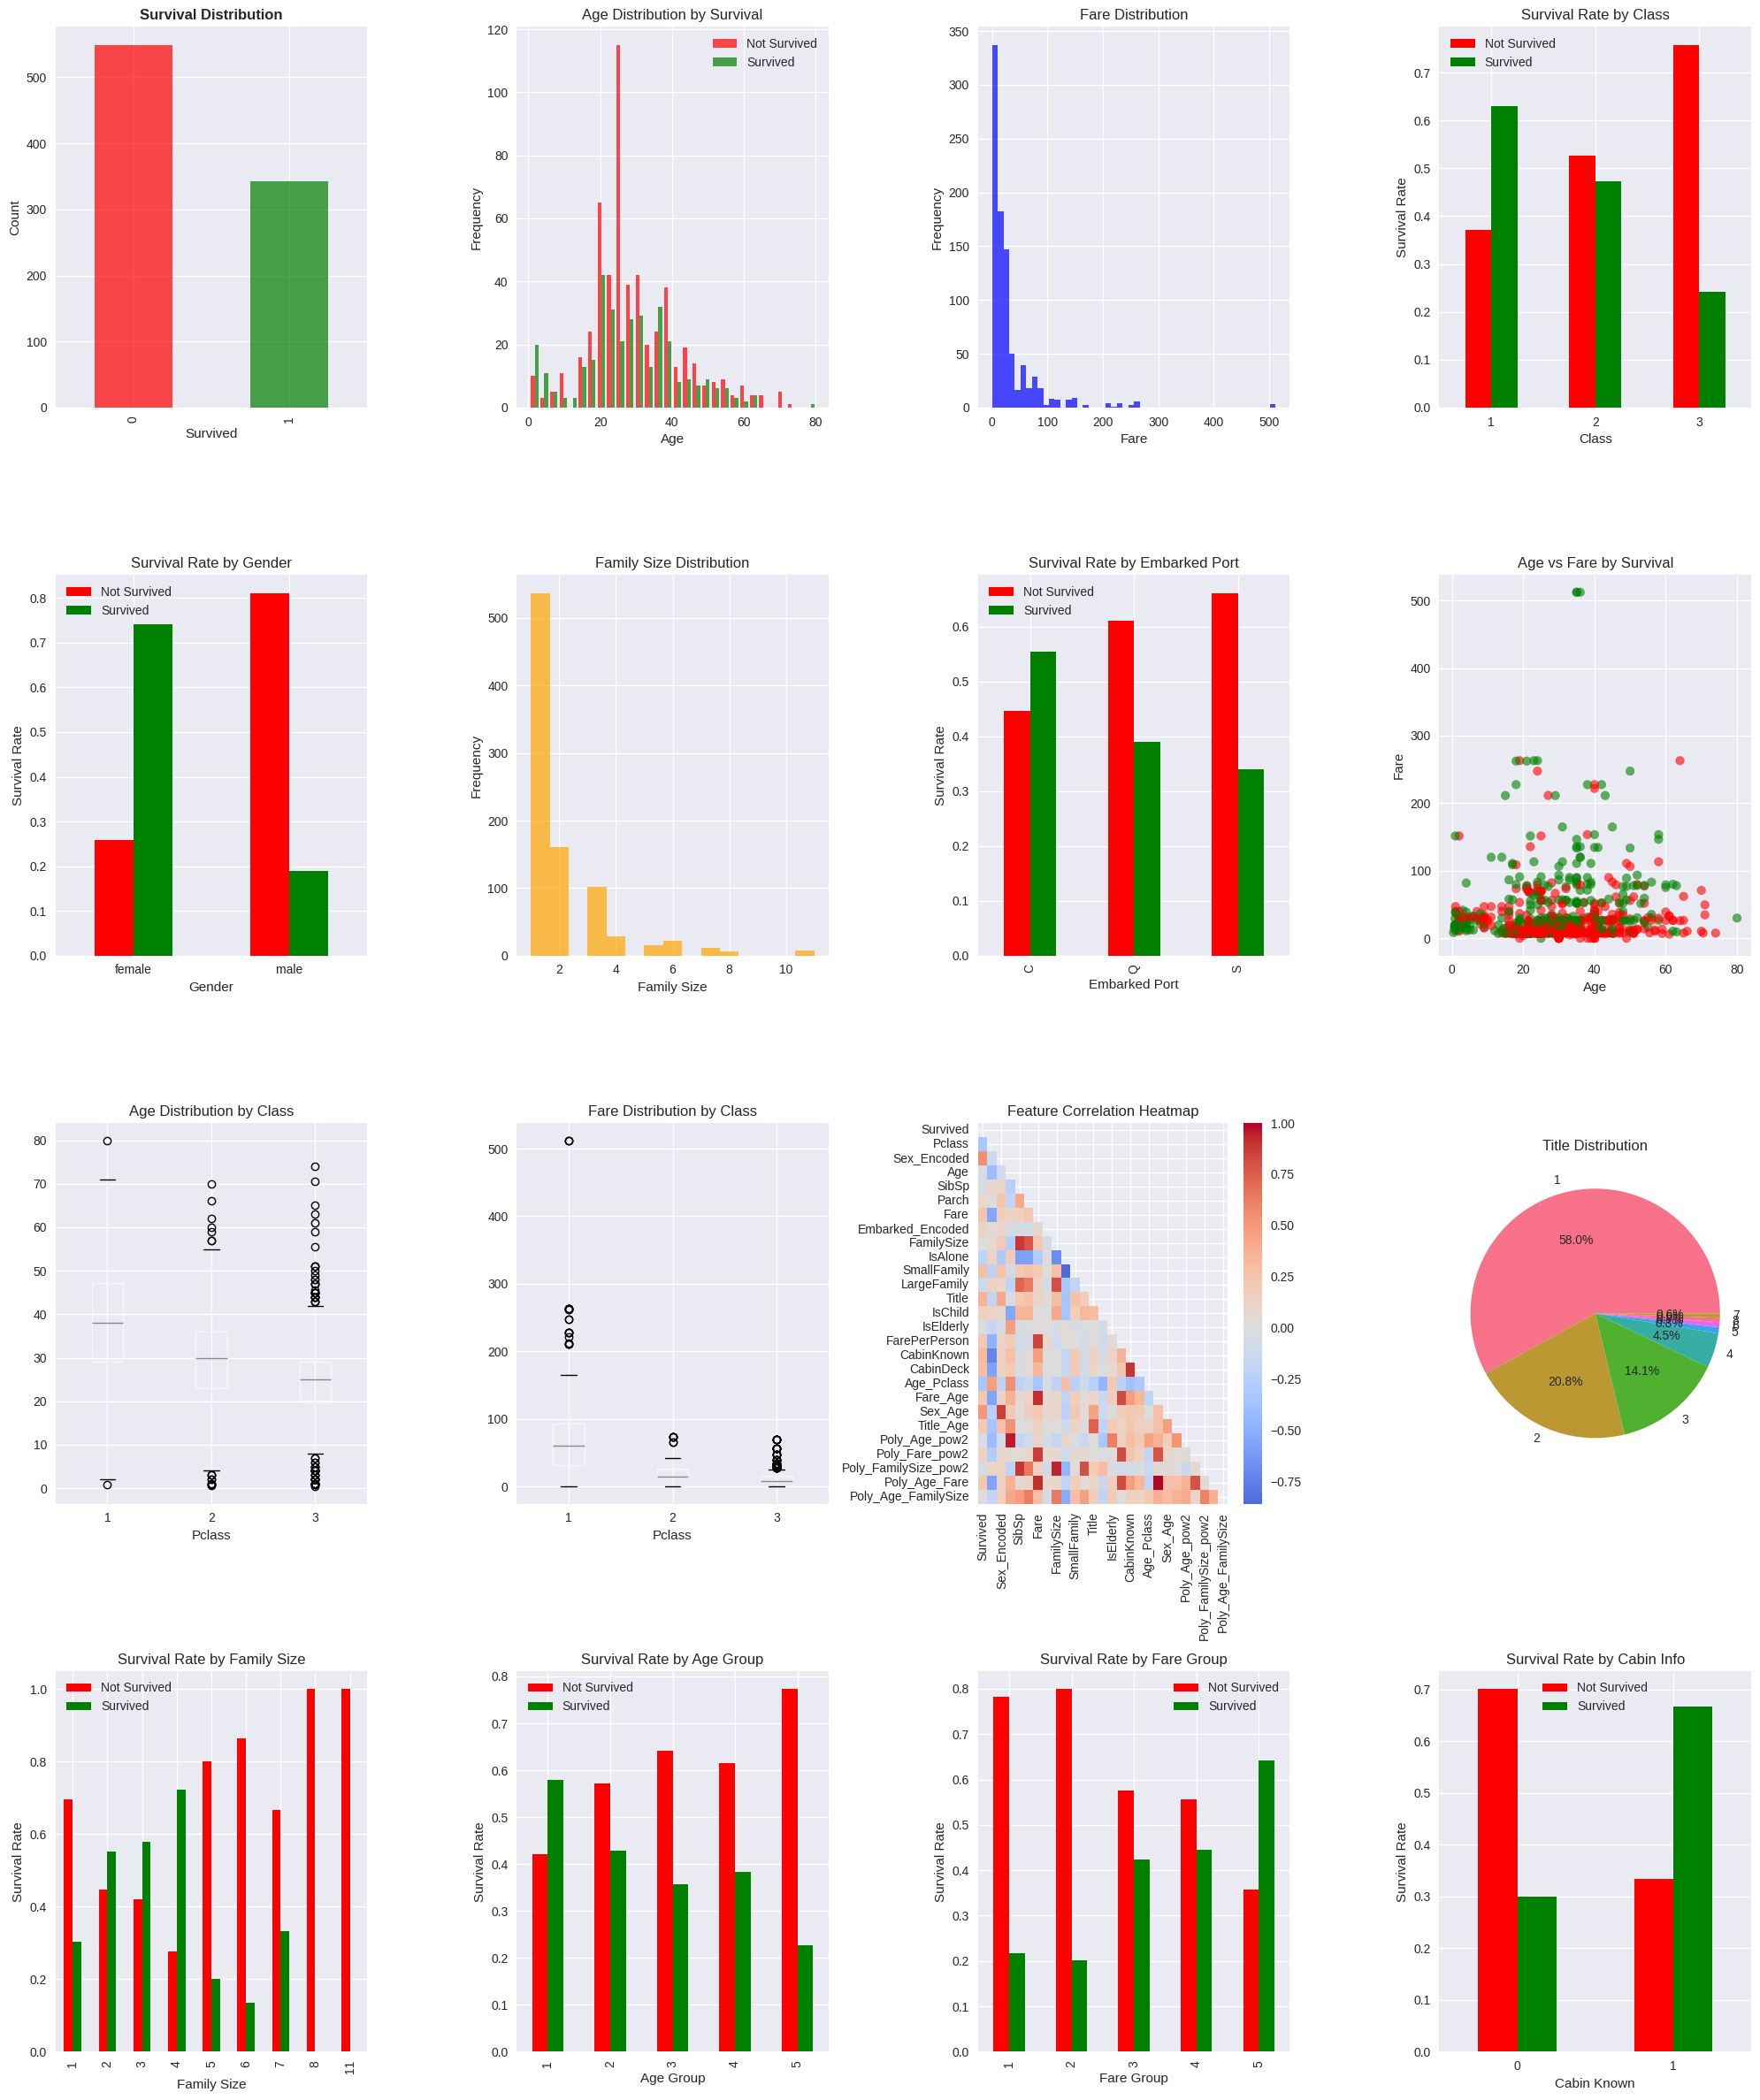

In [11]:
fig = plt.figure(figsize=(20, 24))

plt.subplot(4, 4, 1)
survival_counts.plot(kind='bar', color=['red', 'green'], alpha=0.7)
plt.title('Survival Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.subplot(4, 4, 2)
plt.hist([df_engineered[df_engineered['Survived']==0]['Age'],
          df_engineered[df_engineered['Survived']==1]['Age']],
         bins=30, alpha=0.7, label=['Not Survived', 'Survived'], color=['red', 'green'])
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(4, 4, 3)
plt.hist(df_engineered['Fare'], bins=50, alpha=0.7, color='blue')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(4, 4, 4)
class_survival = pd.crosstab(df_engineered['Pclass'], df_engineered['Survived'], normalize='index')
class_survival.plot(kind='bar', ax=plt.gca(), color=['red', 'green'])
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.legend(['Not Survived', 'Survived'])
plt.xticks(rotation=0)

plt.subplot(4, 4, 5)
gender_survival = pd.crosstab(df_engineered['Sex'], df_engineered['Survived'], normalize='index')
gender_survival.plot(kind='bar', ax=plt.gca(), color=['red', 'green'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.legend(['Not Survived', 'Survived'])
plt.xticks(rotation=0)

plt.subplot(4, 4, 6)
df_engineered['FamilySize'].hist(bins=15, alpha=0.7, color='orange')
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Frequency')

plt.subplot(4, 4, 7)
embarked_survival = pd.crosstab(df_engineered['Embarked'], df_engineered['Survived'], normalize='index')
embarked_survival.plot(kind='bar', ax=plt.gca(), color=['red', 'green'])
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.legend(['Not Survived', 'Survived'])

plt.subplot(4, 4, 8)
colors = ['red' if x == 0 else 'green' for x in df_engineered['Survived']]
plt.scatter(df_engineered['Age'], df_engineered['Fare'], c=colors, alpha=0.6)
plt.title('Age vs Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.subplot(4, 4, 9)
df_engineered.boxplot(column='Age', by='Pclass', ax=plt.gca())
plt.title('Age Distribution by Class')
plt.suptitle('')

plt.subplot(4, 4, 10)
df_engineered.boxplot(column='Fare', by='Pclass', ax=plt.gca())
plt.title('Fare Distribution by Class')
plt.suptitle('')

plt.subplot(4, 4, 11)
numerical_cols = df_final.select_dtypes(include=[np.number]).columns
corr_matrix = df_final[numerical_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0, ax=plt.gca())
plt.title('Feature Correlation Heatmap')

plt.subplot(4, 4, 12)
title_counts = df_engineered['Title'].value_counts()
plt.pie(title_counts.values, labels=title_counts.index, autopct='%1.1f%%')
plt.title('Title Distribution')

plt.subplot(4, 4, 13)
family_survival = pd.crosstab(df_engineered['FamilySize'], df_engineered['Survived'], normalize='index')
family_survival.plot(kind='bar', ax=plt.gca(), color=['red', 'green'])
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.legend(['Not Survived', 'Survived'])

plt.subplot(4, 4, 14)
agegroup_survival = pd.crosstab(df_engineered['AgeGroup'], df_engineered['Survived'], normalize='index')
agegroup_survival.plot(kind='bar', ax=plt.gca(), color=['red', 'green'])
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.legend(['Not Survived', 'Survived'])

plt.subplot(4, 4, 15)
faregroup_survival = pd.crosstab(df_engineered['FareGroup'], df_engineered['Survived'], normalize='index')
faregroup_survival.plot(kind='bar', ax=plt.gca(), color=['red', 'green'])
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.legend(['Not Survived', 'Survived'])

plt.subplot(4, 4, 16)
cabin_survival = pd.crosstab(df_engineered['CabinKnown'], df_engineered['Survived'], normalize='index')
cabin_survival.plot(kind='bar', ax=plt.gca(), color=['red', 'green'])
plt.title('Survival Rate by Cabin Info')
plt.xlabel('Cabin Known')
plt.ylabel('Survival Rate')
plt.legend(['Not Survived', 'Survived'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()